In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('IRIS.csv')

In [4]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
dataset[dataset.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [22]:
import seaborn as sns

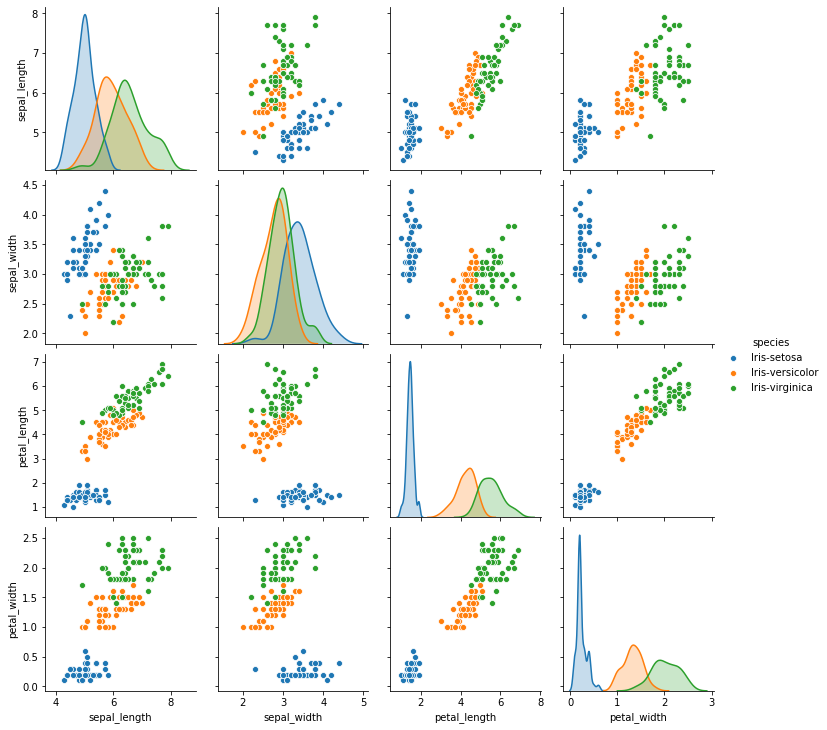

In [25]:
sns.pairplot(dataset, hue='species')

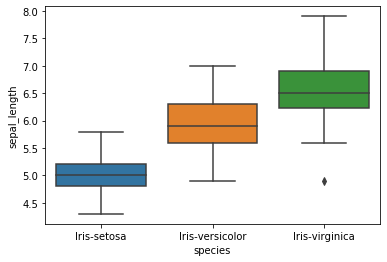

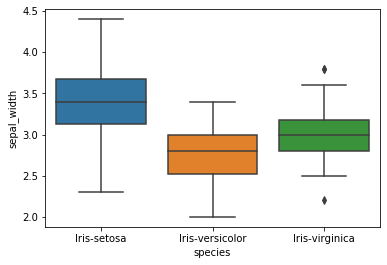

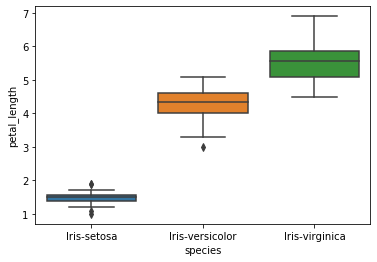

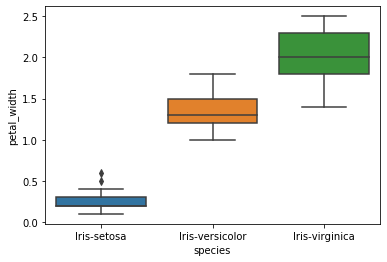

TypeError: unsupported operand type(s) for /: 'str' and 'int'

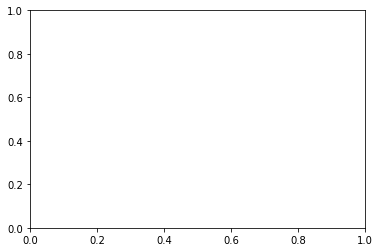

In [44]:
for feature in dataset.columns:
    sns.boxplot(y=feature, x='species', data=dataset, orient='v')
    plt.show()

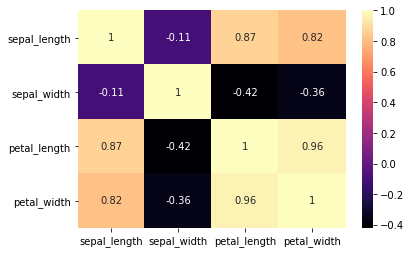

In [32]:
sns.heatmap(dataset.corr(), annot=True, cmap='magma')

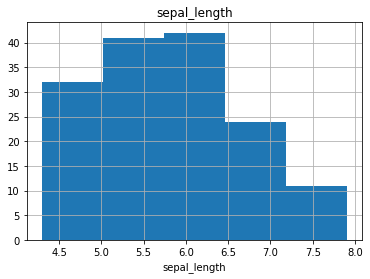

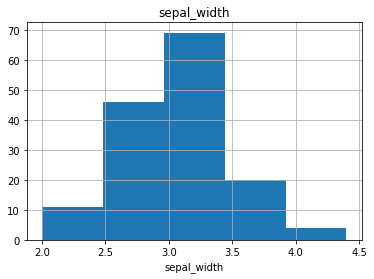

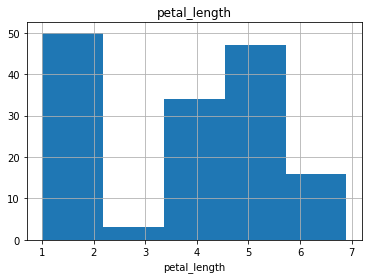

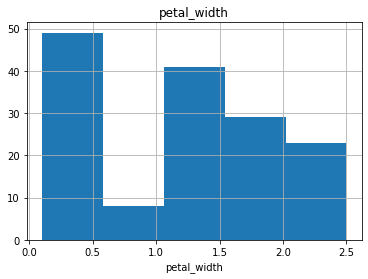

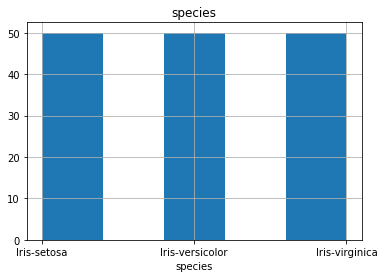

In [35]:
for feature in dataset.columns:
    dataset[feature].hist(bins=5)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [45]:
X=dataset.drop('species', axis=1)
Y=dataset['species']

In [51]:
from sklearn.model_selection import train_test_split
x_train,z_test,y_train,y_test = train_test_split(X,Y, test_size=0.8, random_state=42)

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
predicted = log_model.predict(z_test)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, predicted)

0.9

In [66]:
log_model.score(z_test,y_test)

0.9

In [67]:
log_model.score(x_train,y_train)

0.9333333333333333

### SVM

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [89]:
param_grid = {'C':[0.1, 1, 100, 10], 'gamma':[1,0.1,0.01,0.001]}

In [90]:
svm_model = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
svm_model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 100, 10],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [91]:
svm_model.best_params_

{'C': 100, 'gamma': 0.1}

In [77]:
predicted_svm = svm_model.predict(z_test)

In [82]:
accuracy_score(y_test, predicted_svm)

0.9666666666666667

In [87]:
svm_model.score(x_train, y_train)

1.0

In [88]:
svm_model.score(z_test, y_test)

0.9666666666666667